##**Regression Project: Predicting number of Bikes on Rent**

This is the first project of edwisor Data science career path.

This project is a supervised learning regression problem. Here the goal is to predict the number of bikes that can go on rent using the past two years data.

Several regression machine learning algorithms are tested to predict the number of bikes and  mean absolute error, mean squared error, R squared are calulated to check the performance of these algorithms.

First the behavioral pattern of customers is studied accroding to the given data which contains factors like season, year, month, weather condition, temperature, wind speed. Then suitable factors which play a improtant role in the number of bikes are selected and fed to the algorithms.

By this kind of analysis we can ensure the future demand, by which we can prepare our stock as per the predicted numbers,
this will increase the company revenue in return. 

## Intialization

Here the required libraries and data is imported.

we have 731 observations which is for 2 years and 15 features which are:-
- Date 
- Season
- Year
- Month
- Holiday
- Weekday
- Working Day
- Weather Situation
- Temerature
- Feeling Temperature
- Humidity
- Windspeed
- Casual Users
- Registered users
- Number of Bikes

The target variable is 'cnt' which is the number of bikes.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Importing required libraries
import numpy as np
import pandas as pd

#Importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading dataset
bikeRent = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/edwisor-india-bucket/projects/data/DataN0103/day.csv",
                       index_col=0)

In [ ]:
#Get Dimensions of dataset
bikeRent.shape

(731, 15)

In [ ]:
#Get first 5 rows 
bikeRent.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Statistical analysis of data
bikeRent.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#Get names of column of dataset
bikeRent.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

## Data Preparation

Before doing the analysis we need to first identify the categorical features and replace the numerical values with respective layman values.

- Replacing 1, 2, 3, 4 in Seasons feature to 
 - 1: Spring
 - 2: Summer
 - 3: Fall
 - 4: Winter
- 0, 1 in Holiday to 
 - 0: Holiday
 - 1: Working Day
- 0, 1 in Working Day to 
 - 0: Holiday
 - 1: Working Day
- 1, 2, 3, 4 in Weather Condition to 
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Temperature and Feeling Temperature values are normalized so restoring them to normal values.
- Restoring Humidity by multiplying with 100.
- Restoring Windspeed by multiplying with 67.

This should be done for better understading of features in analysis.



In [ ]:
#Create new dataset for Exploratory Data Analysis
data = bikeRent.copy()

#changing numeric to categorical and changing columns name to actual names
#data['Index'] = data['instant']
data['Date'] = data['dteday'].astype('category')
data['Season'] = data['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter']).astype('category')
data['Year'] = data['yr'].replace([0,1],['2011','2012']).astype('category')
data['Month'] = data['mnth'].astype('category')
data['Holiday'] = data['holiday'].replace([0,1],['Holiday','Working day']).astype('category')
data['Weekday'] = data['weekday'].astype('category')
data['Working Day'] = data['workingday'].replace([0,1],['Holiday','Working day']).astype('category')
data['Weather Condition'] = data['weathersit'].replace([1,2,3,4],['Clear, Few clouds, Partly cloudy, Partly cloudy',
                                                                  'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                                                  'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                                                  'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog']).astype('category')

data['Temperature'] = (data['temp']*(39 + 8)) - 8
data['Feeling Temperature'] = (data['atemp']*(50 + 16)) - 16
data['Humidity'] = data['hum'] * 100
data['Wind Speed'] = data['windspeed'] * 67
data['Casual Users'] = data['casual']
data['Registered Users'] = data['registered']
data['Count'] = data['cnt']

data = data.drop(columns = bikeRent.columns)

In [ ]:
data.groupby(['Month','Year']).sum()

Temperature  Feeling Temperature  ...  Registered Users   Count
Month Year                                    ...                          
1     2011    40.058648           -77.614338  ...             35116   38189
      2012   152.938952            66.859154  ...             87775   96744
2     2011   147.822734            77.594102  ...             41973   48215
      2012   197.804895           137.994910  ...             94416  103137
3     2011   235.238208           169.562084  ...             51219   64045
      2012   406.791733           401.392430  ...            133257  164875
4     2011   424.375691           424.414302  ...             72524   94870
      2012   421.021019           425.626062  ...            135768  174224
5     2011   593.025896           630.964652  ...            104771  135821
      2012   644.216698           691.724252  ...            151630  195865
6     2011   737.247500           800.187678  ...            112900  143512
      2012   711.906604           767.265360  ...            159536  202830
7     2011   857.244245           958.010690  ...            104889  141341
      2012   848.196557           931.141364  ...            161902  203607
8     2011   779.712622           844.979420  ...            107849  136691
      2012   789.094057           828.855488  ...            171306  214503
9     2011   624.170059           645.719166  ...            100873  127418
      2012   634.317547           688.305204  ...            174795  218573
10    2011   436.754327           442.656158  ...             98289  123511
      2012   480.571205           496.658216  ...            164303  198841
11    2011   327.296768           310.658616  ...             86573  102167
      2012   233.902974           184.082034  ...            131655  152664
12    2011   225.790503           178.930784  ...             78875   87323
      2012   222.435737           163.714748  ...            110468  123713

[24 rows x 7 columns]

## Exploratory data analysis

Here the analysis of various categorical feature with respect to target feature is visualised.

Analysis done :-
- Probability distribution of target feature.
- Bikes hired as per seasons.
- Total count for years 2011 and 2012.
- Month wise total sum.
- Comparison between weekdays and weekends.
- Realtion between Temperature, Humidity, Windspeed, Casual and registered users i.e. all continuous features with target feature.
- Distribution of all continuous features.


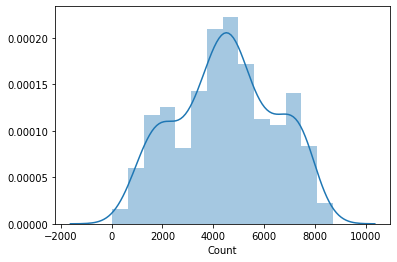

In [ ]:
sns.distplot(data['Count'])

#Probability distribution of target variabel 'Count' can be seen as nearly normally distributed

In [ ]:
#Separating colums by category
Categorical = ['Date','Season','Year','Month','Holiday','Weekday','Working Day','Weather Condition']
Continuous = ['Temperature','Feeling Temperature','Humidity','Wind Speed','Casual Users','Registered Users','Count']

Season
Fall      1061129
Spring     471348
Summer     918589
Winter     841613
Name: Count, dtype: int64



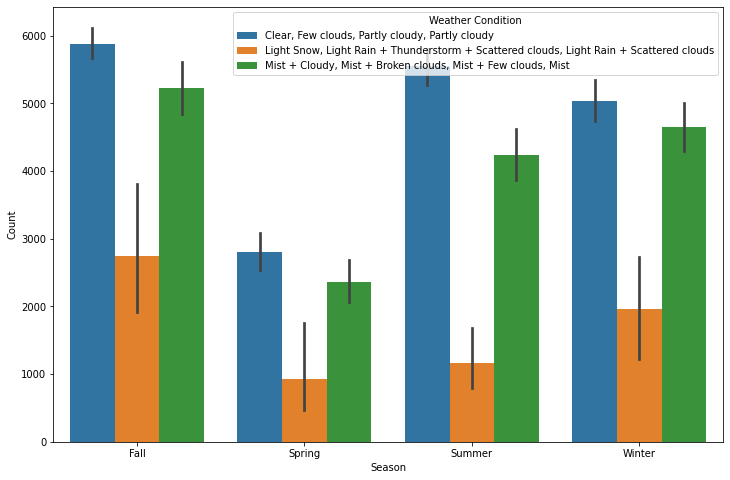

In [ ]:
#distribution of categorical variables with target variable
print(data.groupby('Season')['Count'].sum())

#Number of bikes hired season wise
print()
plt.gcf().set_size_inches(12,8)
sns.barplot(data=data,x='Season',y='Count',hue = 'Weather Condition')

- Fall is the season when most of the bikes got hired followed by summer

- Most of bikes were hired when the weather was clear or partially cloudy

- And no bikes were hired in heavy rain and ice pallets condition.

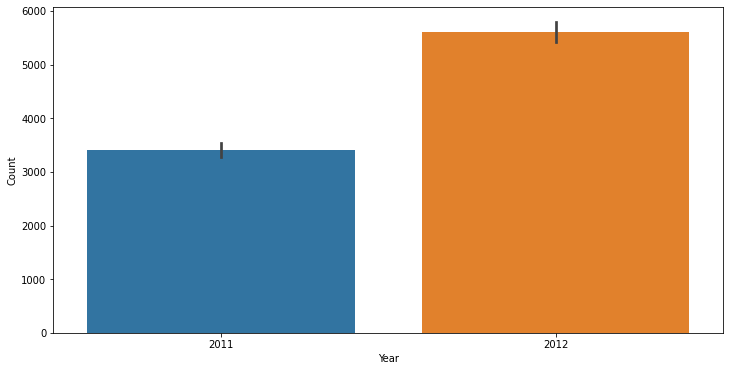

In [ ]:
plt.gcf().set_size_inches(12,6)
sns.barplot(data=data,x='Year',y='Count')

#Year wise most of the bikes were hired in 2012, might be beacause of the popularity of the company

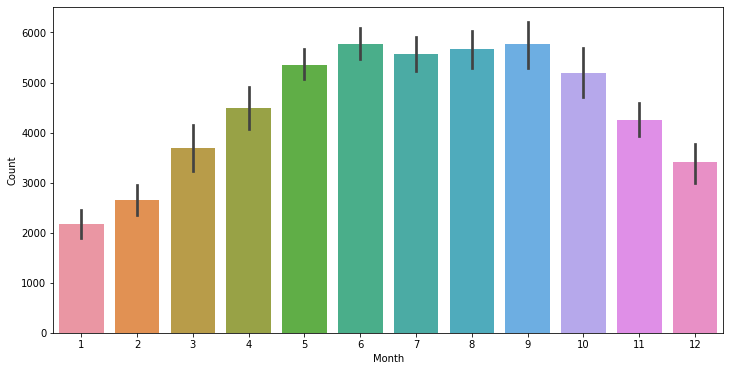

In [ ]:
plt.gcf().set_size_inches(12,6)
sns.barplot(data=data,x='Month',y='Count')

#most of bikes were hired in months of June,July,August,September which are months of summer and fall

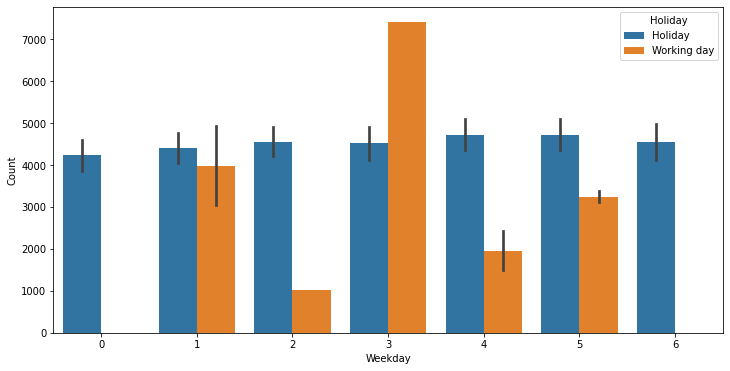

In [ ]:
plt.gcf().set_size_inches(12,6)
sns.barplot(data=data,x='Weekday',y='Count',hue = 'Holiday')

#most of the bikes were hired on 3 day of week

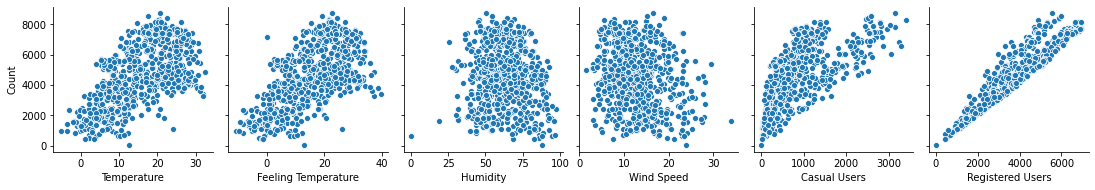

In [ ]:
#Relation of continuous variable with target variable

sns.pairplot(data = data,
             x_vars = ['Temperature','Feeling Temperature','Humidity','Wind Speed','Casual Users','Registered Users'],
             y_vars = ['Count'])

- With the pair plot we can see the distribution of target variable 'Count' with the other continuous variables.
- The target variable is highly dependent on Registered users

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d4878aac8>,
      dtype=object)

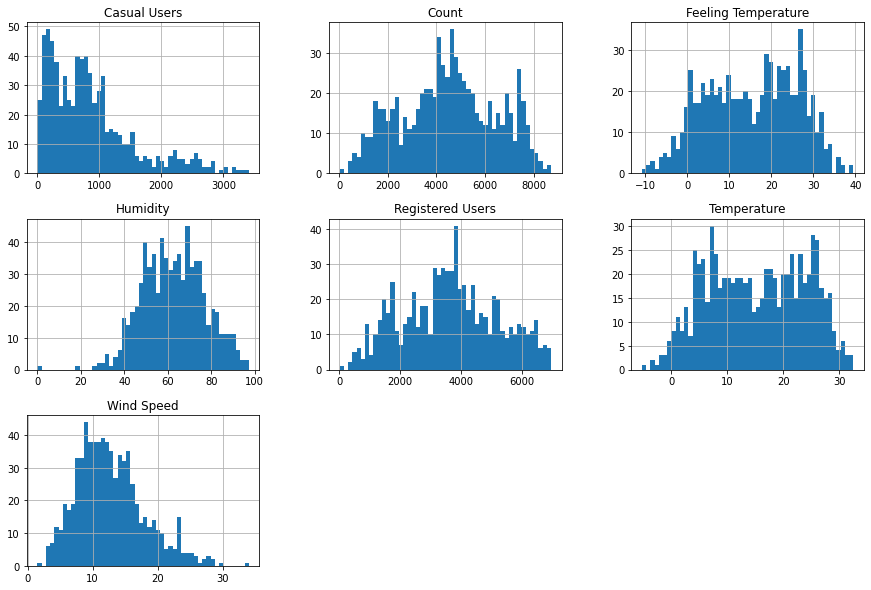

In [ ]:
#Distribution of continuous variable
data[Continuous].hist(bins = 50,figsize = (15,10))

- From histogram distribution it can be seen that Casual users data is skewed to left because of outliers
- Nearly negligible dependency on 'Humidity'
- we need to remove 'Humidity' in feature selection afterwords

## Missing Value Analysis

Here analysis of missing value is done.
As per analysis there is no missing value in data

In [ ]:
#Missing value analyses
data.isnull().sum()

Date                   0
Season                 0
Year                   0
Month                  0
Holiday                0
Weekday                0
Working Day            0
Weather Condition      0
Temperature            0
Feeling Temperature    0
Humidity               0
Wind Speed             0
Casual Users           0
Registered Users       0
Count                  0
dtype: int64

## Outlier Detection

Outliers are the values which are far from other observations, they can impact mean and standard deviation with high variablity. So these values should be taken care of either by removing them or replacing them with suitable values like mean, median or mode.

Box plot method is used to detect the outliers in the data.

Certain outliers are detected in Humidity, windspeed and casual users.

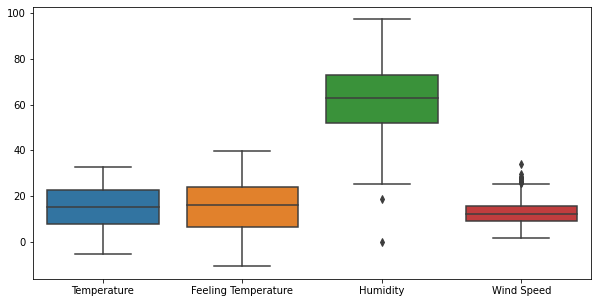

In [ ]:
#Detection of outliers
var1 = ['Temperature','Feeling Temperature','Humidity','Wind Speed']

plt.gcf().set_size_inches(10,5)
sns.boxplot(data = data[var1])

#from boxplot the outliers can be seen in Humidity and Wind speed

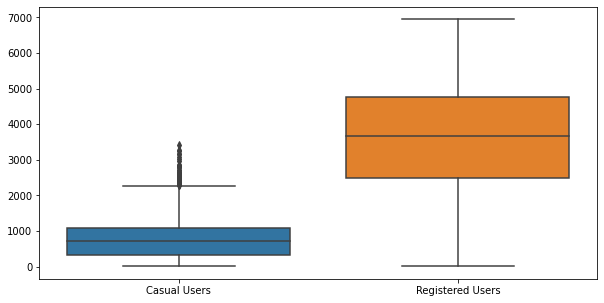

In [ ]:
var2 = ['Casual Users','Registered Users']

plt.gcf().set_size_inches(10,5)
sns.boxplot(data = data[var2])

#here the outliers can be seen in Casual users

## Outlier Removal

The outliers are removed using quarantile method.

In [ ]:
#oulier removeal from Humidity
q75, q25 = np.percentile(data['Humidity'], [75 ,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

data = data.drop(data[data['Humidity'] < min].index)
data = data.drop(data[data['Humidity'] > max].index)

In [ ]:
#outlier removal from windspeed
q75, q25 = np.percentile(data['Wind Speed'], [75 ,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

data = data.drop(data[data['Wind Speed'] < min].index)
data = data.drop(data[data['Wind Speed'] > max].index)

In [ ]:
#outlier removal from casual users
q75, q25 = np.percentile(data['Casual Users'], [75 ,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

data = data.drop(data[data['Casual Users'] < min].index)
data = data.drop(data[data['Casual Users'] > max].index)

## Feature Selection

Here the coorelation between all the continuous variable including target varibale using heatman distribution is checked. 

And from the distribution it is concluded that Temperature and Feelling temperature ane highly coorelated to each other.

Registered users is also highly corelated with the target variable.

Also date and casual users are not required to carry forward for machine learning algorithms.

So dropping four features Date, Feeling temperature, Registered users, casual users.

In [ ]:
data[Continuous].corr().style.background_gradient(cmap='coolwarm')

,Temperature,Feeling Temperature,Humidity,Wind Speed,Casual Users,Registered Users,Count
Temperature,1.000000,0.991497,0.122406,-0.138183,0.585568,0.542106,0.625918
Feeling Temperature,0.991497,1.000000,0.135352,-0.165645,0.584664,0.544994,0.628104
Humidity,0.122406,0.135352,1.000000,-0.205273,-0.088887,-0.112971,-0.120973
Wind Speed,-0.138183,-0.165645,-0.205273,1.000000,-0.177481,-0.213087,-0.230985
Casual Users,0.585568,0.584664,-0.088887,-0.177481,1.000000,0.418987,0.640080
Registered Users,0.542106,0.544994,-0.112971,-0.213087,0.418987,1.000000,0.965803
Count,0.625918,0.628104,-0.120973,-0.230985,0.640080,0.965803,1.000000


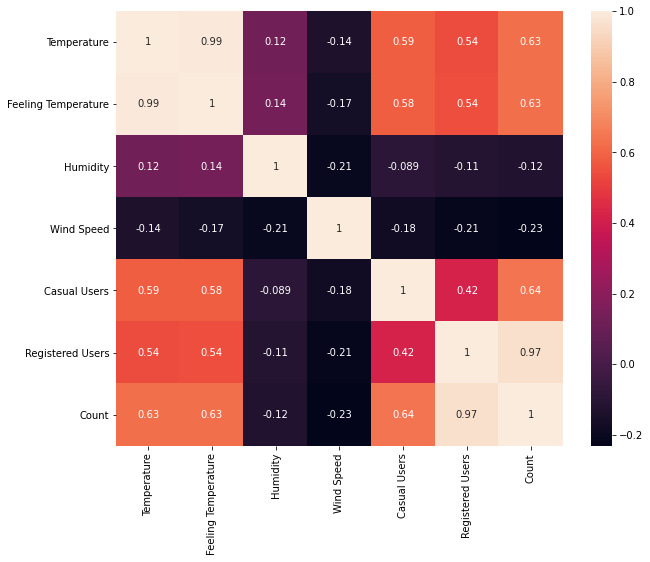

In [ ]:
CorrMat = data[Continuous].corr()
plt.gcf().set_size_inches(10,8)
sns.heatmap(CorrMat,annot =True)

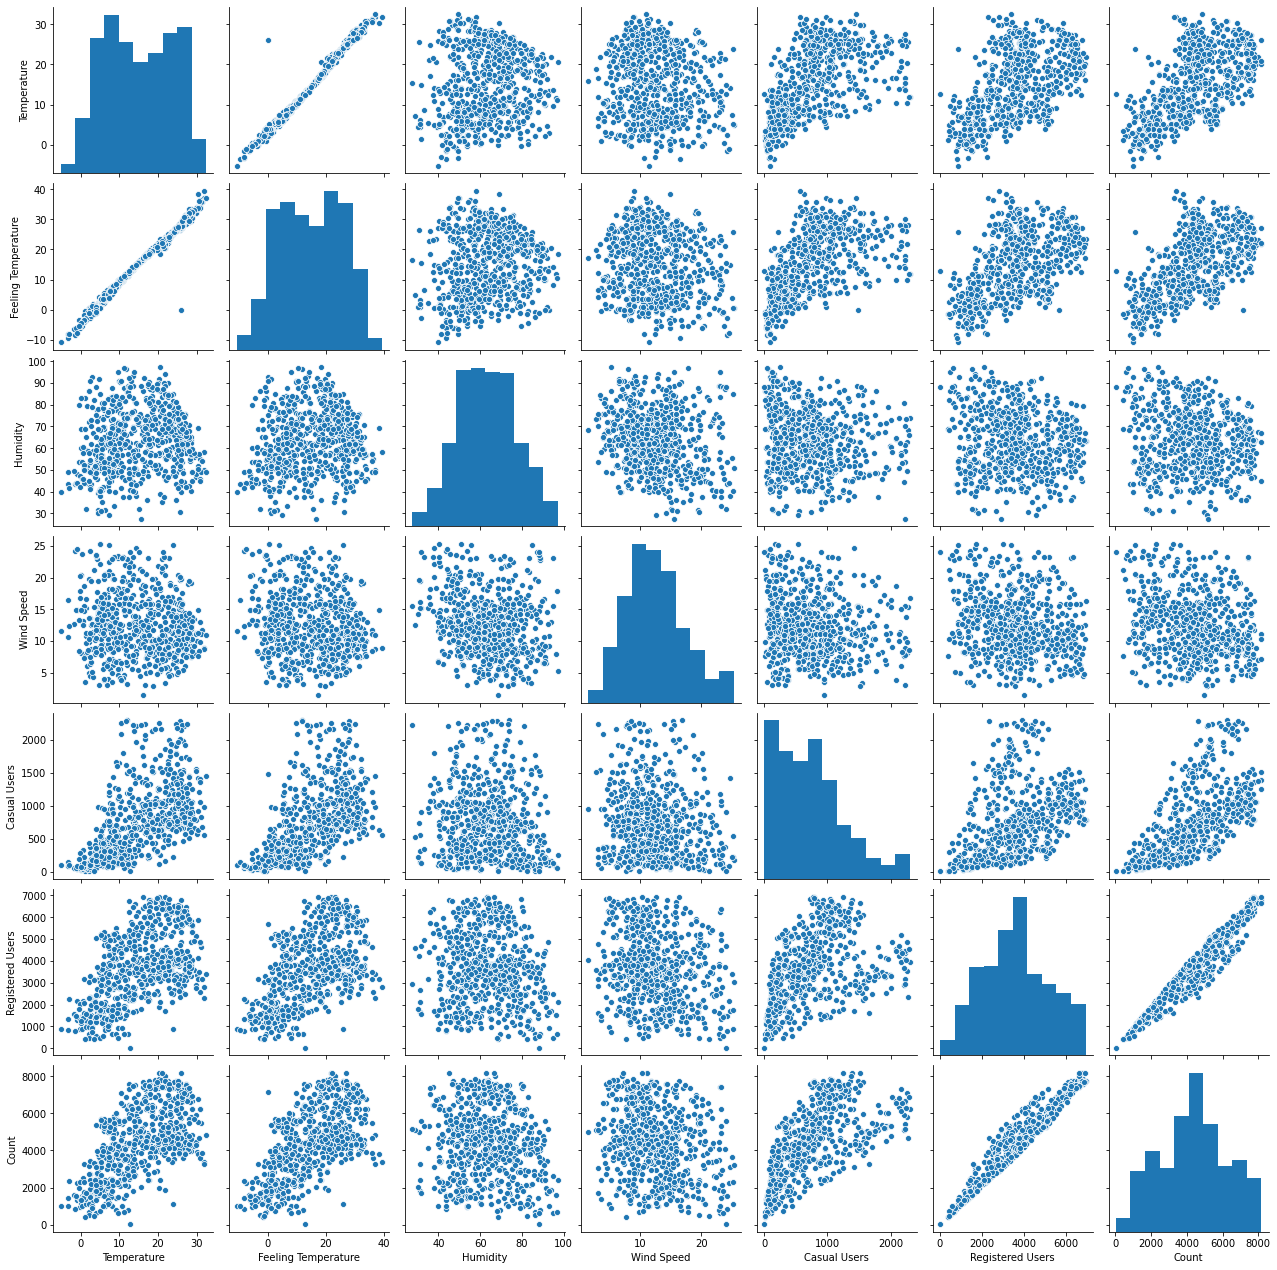

In [ ]:
sns.pairplot(data[Continuous])

#From the above plots it can be seen that :
#Temerature and Feeling Temperature are highly correlated
#Registered Users is also highly corelated with target variable count
#So dropping two variables Feeling Temperature,Registered Users from the dataset

#after expermenting to prevent model overfitting Casual users also need to be dropped 

In [ ]:
data.columns

Index(['Date', 'Season', 'Year', 'Month', 'Holiday', 'Weekday', 'Working Day',
       'Weather Condition', 'Temperature', 'Feeling Temperature', 'Humidity',
       'Wind Speed', 'Casual Users', 'Registered Users', 'Count'],
      dtype='object')

In [ ]:
data = data.drop(columns=['Date','Feeling Temperature','Registered Users','Casual Users'],axis=1)

In [ ]:
data['Season'] = bikeRent['season'].astype('category')
data['Year'] = bikeRent['yr'].astype('category')
data['Month'] = bikeRent['mnth'].astype('category')
data['Holiday'] = bikeRent['holiday'].astype('category')
data['Weekday'] = bikeRent['weekday'].astype('category')
data['Working Day'] = bikeRent['workingday'].astype('category')
data['Weather Condition'] = bikeRent['weathersit'].astype('category')

#data = pd.get_dummies(data)
#Changing categorical to numerical for modelling input

In [ ]:
data.head(2)

,Season,Year,Month,Holiday,Weekday,Working Day,Weather Condition,Temperature,Humidity,Wind Speed,Count
instant,,,,,,,,,,,
1,1,0,1,0,6,0,2,8.175849,80.5833,10.749882,985
2,1,0,1,0,0,0,2,9.083466,69.6087,16.652113,801


## Sampling

Dividing the data set into 80% training data and 20% test data.

In [ ]:
from sklearn.model_selection import train_test_split

xTrain,xTest,yTrain,yTest = train_test_split(data.loc[:,data.columns != 'Count'],data['Count'] ,test_size = 0.2)

#Spliting dataset into train and test sets with ratio of 20 percent

In [ ]:
xTrain.head(2)

,Season,Year,Month,Holiday,Weekday,Working Day,Weather Condition,Temperature,Humidity,Wind Speed
instant,,,,,,,,,,
15,1,0,1,0,6,0,2,2.966651,49.875,10.583521
226,3,0,8,0,0,0,2,23.803349,81.750,14.916411


## Modelling

Here the tools and techniques are used to develop a model to make predictions. Different evaluation matrices are used to evaluate the performance of different models. It helps to reinforce the confidence in the predictions. 

These models are validated using Kfold cross validation and scores are compared to obtain the best performing model.

Data is tested with five regression algorithms including:-
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- K Neighbours Regressor
- Lasso Regression





In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso

models = []
models.append(('LR ',LinearRegression()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('RFR',RandomForestRegressor()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('LSO',Lasso()))

#Using 5 regression algorithms to check which algorithm is best for this dataset

In [ ]:
from sklearn.model_selection import KFold,cross_val_score

def ModellingAndEvaluationWithCrossValidation(models,scoring):
    for name,model in models:
        kfold = KFold(n_splits=10, random_state=0)
        Scores =  cross_val_score(model,xTrain,yTrain,scoring=scoring, cv=kfold)
        Scores = np.sqrt(-Scores)
        print(name ,' : ' ,Scores.mean())

def ModellingAndEvaluation(models,scoring):
    for name,model in models:
        model.fit(xTrain,yTrain)
        predict = model.predict(xTest)
        print(name ,' : ' ,scoring(yTest,predict))
        
#Created functions to check the model with cross validation and test set

## Evaluation

### Performance matrices used
- **Mean Absolute error** : It is the absolute sum of predicted values subtracted by actual values divided by total number of values, which tells how far are the predicted value from the actual values on an average.
- **Mean Squared Error** : It is the sum of square of actual values subtracted by predicted values and dividing the sum by total number of values.
- **Mean Absolute Percentage Error** : It is obtained by absolute sum of actual subtracted by predicted value divided by actual value, it is a measure of percentage loss in prediction.
- **R square** : This is also called as coefficient of determination, it shows how well the model fits on the data.
The value of R<sup>2</sup> ranges from 0 to 1 where value being near to 0 represents poor fitness and near to 1 represents good fitness of the model on the data.

All five models are evaluated using these performance matrices. Mean Absolute Error and Mean Squared Error are evaluated using Kfold cross validation. Then the obtained scored are compared to see the performance of the models.


### Mean Absolute Error

**Mean absolute error scores with Cross validation:-**<br>
LR   :  24.756516372481055<br>
DTR  :  24.42818446609717<br>
RFR  :  21.72871879994421<br>
KNN  :  31.88993961677325<br>
LSO  :  24.74685025048984<br>

**Mean absolute error scores with test set:-**<br>
LR   :  673.0230994298247<br>
DTR  :  667.4705882352941<br>
RFR  :  515.1220588235293<br>
KNN  :  1093.6750000000002<br>
LSO  :  671.4968494943123<br>

In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE scores with Cross validation:-")
ModellingAndEvaluationWithCrossValidation(models,'neg_mean_absolute_error')

print()
print("MAE scores with test set:-")
ModellingAndEvaluation(models,mean_absolute_error)

#Mean absolute error score
#Here we can see the error value of Linear Regression is way less than the other algorithms

MAE scores with Cross validation:-
LR   :  24.8229580200882
DTR  :  24.49787624234335
RFR  :  21.216131714704478
KNN  :  32.24282572009112
LSO  :  24.813502042174477

MAE scores with test set:-
LR   :  664.9350135036478
DTR  :  600.2352941176471
RFR  :  402.55823529411765
KNN  :  1053.4676470588236
LSO  :  664.3655581829601


### Mean squared error

**Mean squared error scores with Cross validation:-**<br>
LR   :  818.0101656656103<br>
DTR  :  867.841221570945<br>
RFR  :  667.7082018846622<br>
KNN  :  1218.8729421997991<br>
LSO  :  818.1679241703506<br>

**Mean squared error scores with test set:-**<br>
LR   :  778193.4448160154<br>
DTR  :  875236.8014705882<br>
RFR  :  557750.5021323529<br>
KNN  :  1745766.0673529413<br>
LSO  :  775718.2731361163<br>

In [ ]:
from sklearn.metrics import mean_squared_error

print("MSE scores with Cross validation:-")
ModellingAndEvaluationWithCrossValidation(models,'neg_mean_squared_error')

print()
print("MSE scores with test set:-")
ModellingAndEvaluation(models,mean_squared_error)

#Mean Squraed error
#Tried and tested with different ratio of train and test set

#From Above scores we can see that Linear Regression algorithm is the best fit for the Bike Rental count prediction

MSE scores with Cross validation:-
LR   :  829.238552644739
DTR  :  871.4714486603973
RFR  :  660.6834636974475
KNN  :  1244.9298330369315
LSO  :  829.2419790976276

MSE scores with test set:-
LR   :  773312.1234234145
DTR  :  718838.2647058824
RFR  :  347890.01208676473
KNN  :  1638351.0999999999
LSO  :  772367.428476732


### Mean absolute percentage error

MAPE scores:-<br>
LR   :  22.059973855505874<br>
DTR  :  23.094885769820984<br>
RFR  :  20.002969760733535<br>
KNN  :  38.408839925256736<br>
LSO  :  21.95474677633306<br>

In [ ]:
def MAPE(actual,predicted):
    return np.mean((abs(actual-predicted))/actual)*100

print("MAPE scores with test set:-")
ModellingAndEvaluation(models,MAPE)

MAPE scores with test set:-
LR   :  20.48753198527721
DTR  :  18.912773549888918
RFR  :  14.413114481343566
KNN  :  34.57299464487779
LSO  :  20.46678428034319


### R Squared Value

R squared scores with test set:-
LR   :  0.830750294699801<br>
DTR  :  0.7753703908767058<br>
RFR  :  0.9041022858422911<br>
KNN  :  0.5952925705228493<br>
LSO  :  0.8308547664967059<br>

In [ ]:
from sklearn.metrics import r2_score

print("R squared scores with test set:-")
ModellingAndEvaluation(models,r2_score)

R squared scores with test set:-
LR   :  0.751014079902971
DTR  :  0.747899808425404
RFR  :  0.8821635340901736
KNN  :  0.47249455463130496
LSO  :  0.7513182465303729


## RandomForest Regressor is the best fit for this dataset
MAE =  447.4333823529412<br>
MSE =  392496.15887647064<br>
MAPE=  16.850845290622114<br>
R<sup>2</sup>  =  0.9017552147082286<br>

Form above training and evaluation it is concluded that random forest regressor is the best fit for the data set and above are the given values for the different evaluation metrices used. Here we can see that R<sup>2</sup> value is quite high which indicated that the model sucessfully captures approx 90 percent of the data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

RFR = RandomForestRegressor()
RFR.fit(xTrain,yTrain)
predict = RFR.predict(xTest)

MAE = mean_absolute_error(yTest,predict)
MSE = mean_squared_error(yTest,predict)
# MAPE = MAPE(yTest,predict)
R2 = r2_score(yTest,predict)

print('MAE = ',MAE)
print('MSE = ',MSE)
print('MAPE= ',MAPE)
print('R2  = ',R2)

#Aplied Random Forest regression to model and calculated MAE,MSE,MAPE and RSquared value

MAE =  413.98161764705884
MSE =  376260.2812823529
MAPE=  <function MAPE at 0x7f8d46c8dbf8>
R2  =  0.8788542045399194


In [ ]:
output  = pd.DataFrame({'Actual value':yTest,'Predicted value':predict})

In [ ]:
import pickle
pickle.dump(RFR, open('model.pkl','wb'))

from google.colab import files
files.download('model.pkl') 

In [82]:
!jupyter nbconvert --to html bike.ipynb

[NbConvertApp] Converting notebook bike.ipynb to html
[NbConvertApp] Writing 1638761 bytes to bike.html
